In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import skew
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import scipy.stats
from scipy.stats import chi2
file_url = "PEP1.csv"
data=pd.read_csv(file_url, index_col="Id")

In [5]:
import pandas as pd
file_url ="PEP1.csv"
data = pd.read_csv(file_url, index_col="Id")
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# Q 1 a  identify the shape of dataset
# Answer
data.shape
#1460 rows and 80 columns

(1460, 80)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [8]:
#The abovementioned shows that in this library we have 35 numerical  (34 + Id) and 43 categorical features

In [9]:
null_value = data.isna().sum()
null_value

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [10]:
#Q 1 b  Identify variables with null values
# Answer
# null_value = data.isna().any() alternative answer
null_value =data.isna().sum(axis=0)
null_value
#the tabular datasets are too inconvenient with a lot of collumns and many rows, so we use this code

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [11]:
#Q1 b.	Identify variables with null values
dataNull = data.isnull().sum()[data.isnull().sum()>0].sort_values(ascending = False)
dataNull
# This command gives a better view of all the variable that have null values.

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [12]:
#Since we need to use these variables 
#for assesing house price perhaps later we should check which has a treshold, 
#I will set a 30 % treshold as I found from external sources with similar problems, #1460 are the observations per column len(data), so we need this number for ratio
#sources: course material Simplieleran, analuticsvidhya, kaggler
null_value.where((null_value/1460)>0.3).dropna()
#This is not a direct answer to the question, as I say I am studying extra material about

Alley          1369.0
FireplaceQu     690.0
PoolQC         1453.0
Fence          1179.0
MiscFeature    1406.0
dtype: float64

In [13]:
# Q1 c  Identify variables with unique values
#Answer
UniqueValues = data.nunique() 
print(UniqueValues)

MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 80, dtype: int64


In [14]:
#Q2  Generate a separate dataset for numerical and categorical variables

# Answer for numerical variables

dataNumerical= df1=data.select_dtypes(exclude = 'object')
dataNumerical



,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500


In [15]:
dataNumerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1452 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

In [16]:
#Q2  Generate a separate dataset for numerical and categorical variables

# Answer for categorical variables

dataCateg= df3= data.select_dtypes(include = 'object')
dataCateg

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
5,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal


In [17]:
dataCateg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     1452 non-null   object
 18  ExterQual      1460 non-null

In [18]:
#Q3-a. Treatment of missing values -- mean 
df2=df1.fillna(df1.mean())
df2

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500


In [19]:
df2.head(10)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.000000,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.000000,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.000000,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.000000,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.000000,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
6,50,85.000000,14115,5,5,1993,1995,0.0,732,0,...,40,30,0,320,0,0,700,10,2009,143000
7,20,75.000000,10084,8,5,2004,2005,186.0,1369,0,...,255,57,0,0,0,0,0,8,2007,307000
8,60,70.049958,10382,7,6,1973,1973,240.0,859,32,...,235,204,228,0,0,0,350,11,2009,200000
9,50,51.000000,6120,7,5,1931,1950,0.0,0,0,...,90,0,205,0,0,0,0,4,2008,129900


In [20]:
examinedf2=df2.isna().sum()
examinedf2  # this is a way to check whehther the missing value treatment worked ! As we can see, no missing values

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchebvGr       0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1460 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

In [22]:
#Q3 b.	Identify the skewness and distribution

skewvalue= df2.skew(axis=0, skipna=True)
skewvalue

MSSubClass        1.407657
LotFrontage       2.384950
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.676412
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchebvGr        4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.668175
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
SalePrice         1.882876
d

In [23]:
# parameters closer to 0 like YrSold, Full Bath, are more symmetrically distirbured
#also skew values between -0,5 to 0,5 are fairly symmetrical -->BedroomAbvGr, MoSold, GarageArea, GarageCars, Overall Quality
# variables with >1 or less <-1 have, are highly skewed


In [24]:
#Q3 c.	Identify significant variables using a correlation matrix 
correlation=df2.corr()
correlation

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022895,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179283,0.215828,0.043340,...,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.006768,0.334901
LotArea,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103960,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.052820,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.127788,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.117598,0.014228,0.572323,-0.375983,1.000000,0.592855,0.314745,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.082746,0.013788,0.550684,0.073741,0.592855,1.000000,0.179186,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022895,0.179283,0.103960,0.410238,-0.127788,0.314745,0.179186,1.000000,0.263582,-0.072302,...,0.159349,0.124965,-0.109849,0.018795,0.061453,0.011723,-0.029815,-0.005940,-0.008184,0.475241
BsmtFinSF1,-0.069836,0.215828,0.214103,0.239666,-0.046231,0.249503,0.128451,0.263582,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.043340,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072302,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


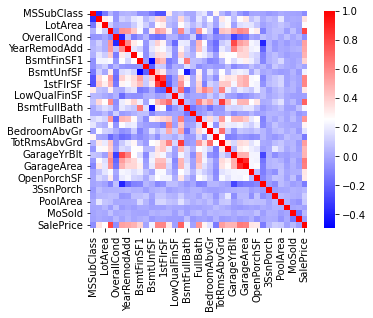

<Figure size 2664x2664 with 0 Axes>

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(data=correlation, square=True, cmap ="bwr")

plt.yticks(rotation = 0)
plt.xticks(rotation =90)
plt.figure(figsize=(37,37))
plt.show()

In [26]:
# We can already see that there are variables with positive corelation with 'SalesPrice' variable, so we will make a new heatmap fir the top 10 in order to find the significant ones
# SalesPrice' corelation matrix


<AxesSubplot:>

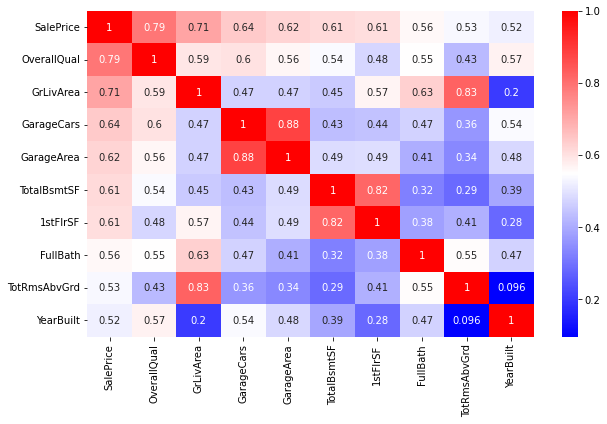

In [27]:
k=10 #number of variables
variab=df2.corr().nlargest(k,'SalePrice')['SalePrice'].index
cm=df2[variab].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap='bwr')

#This code was written by using the course material 'Lesson 6 EDA' from Simplieleran website

In [28]:
# The heatmap points out that OverallQual, GrLivArea, GarageCars, TotalBsmtSF, 1stFlrSF are significant variable for Sales price I use a treshold of >0,6 for strong to moderate corellation.

In [29]:
#Q3 d.	Pair plot for distribution and density


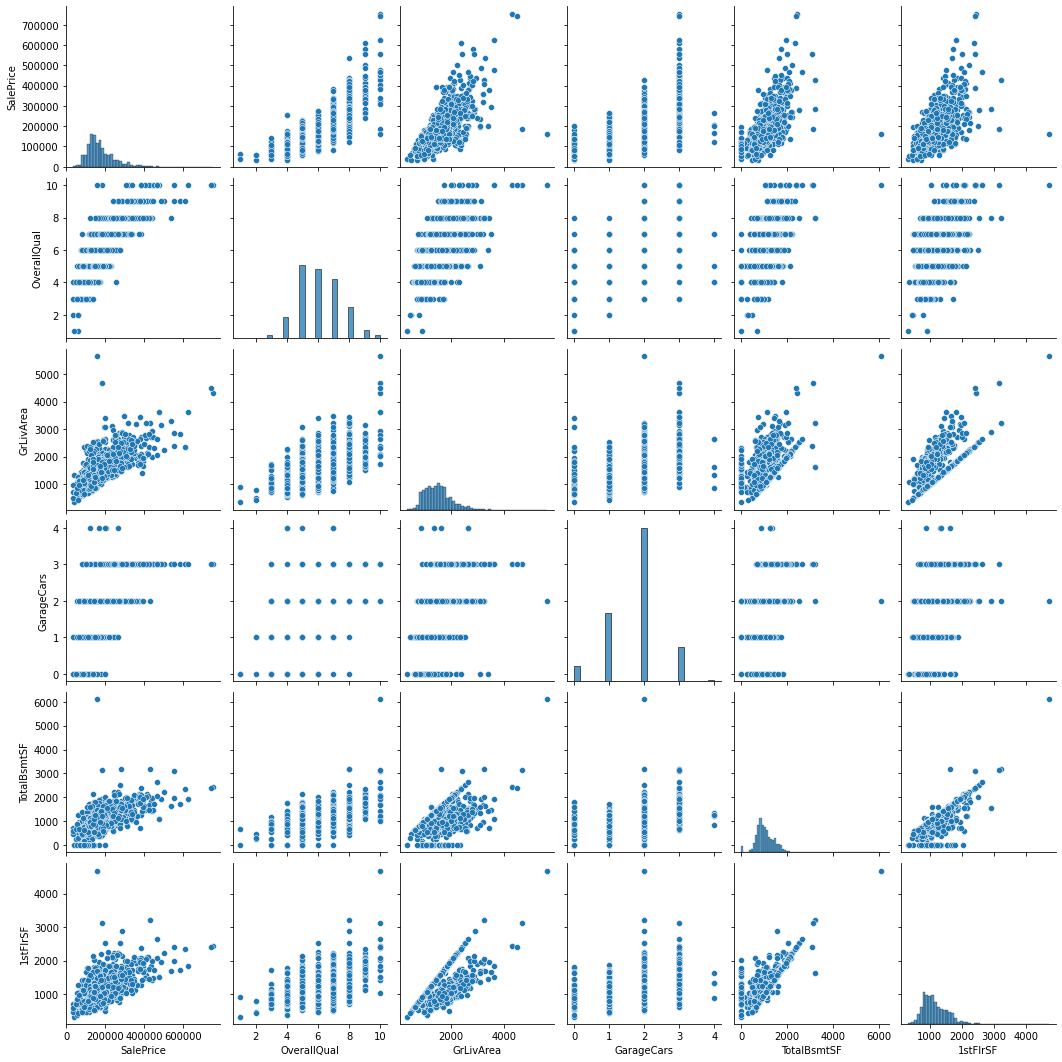

In [30]:
significantvar = ['SalePrice','OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF']
sns.pairplot(df2[significantvar])

In [31]:
#Q4.	EDA of categorical variables

#a a.	Missing value treatment


In [32]:
dataCateg= df3= data.select_dtypes(include = 'object')
dataCateg

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
5,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal


In [33]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     1452 non-null   object
 18  ExterQual      1460 non-null

In [34]:
df3a=df3.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature' ], axis=1)
#we explained above why we had to drop those columns 
#when we needed to look the whole database for null values

In [35]:
df3a

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functiol,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
5,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [36]:
#Q4 a --> missing value treatment

df3a_clean = df3a.apply(lambda x: x.fillna(x.value_counts().index[0]))
df3a_clean

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functiol,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
5,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [37]:
df3a_clean.info()

#This is a method to check whether we still have missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   LotShape       1460 non-null   object
 3   LandContour    1460 non-null   object
 4   Utilities      1460 non-null   object
 5   LotConfig      1460 non-null   object
 6   LandSlope      1460 non-null   object
 7   Neighborhood   1460 non-null   object
 8   Condition1     1460 non-null   object
 9   Condition2     1460 non-null   object
 10  BldgType       1460 non-null   object
 11  HouseStyle     1460 non-null   object
 12  RoofStyle      1460 non-null   object
 13  RoofMatl       1460 non-null   object
 14  Exterior1st    1460 non-null   object
 15  Exterior2nd    1460 non-null   object
 16  MasVnrType     1460 non-null   object
 17  ExterQual      1460 non-null   object
 18  ExterCond      1460 non-null

In [38]:
#Q4 b.	Count plot and box plot for bivariate analysis

In [39]:
#for countplots we don't need numerical data

<AxesSubplot:xlabel='count', ylabel='HeatingQC'>

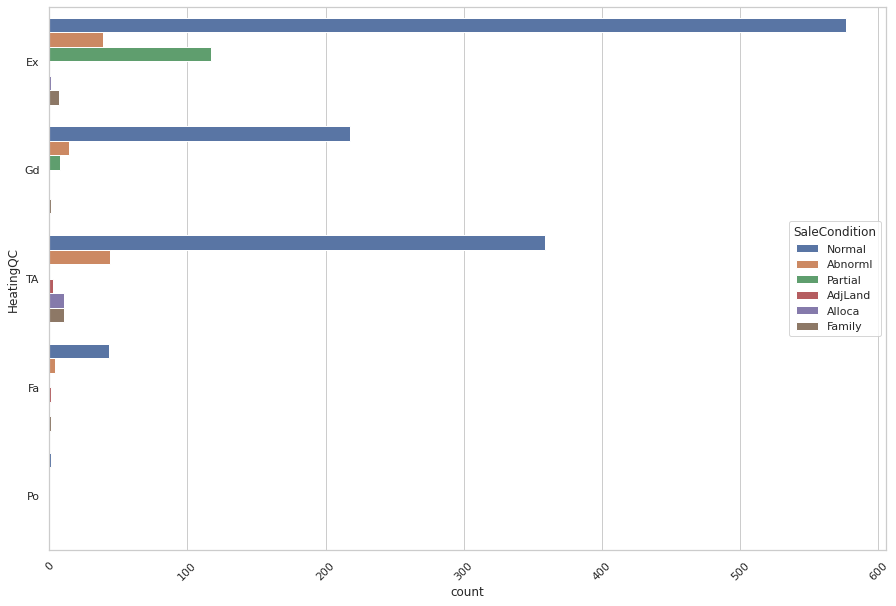

In [40]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,10))
plt.xticks(rotation=45)

sns.countplot(data=df3a_clean, y="HeatingQC", hue="SaleCondition")

<AxesSubplot:xlabel='count', ylabel='SaleType'>

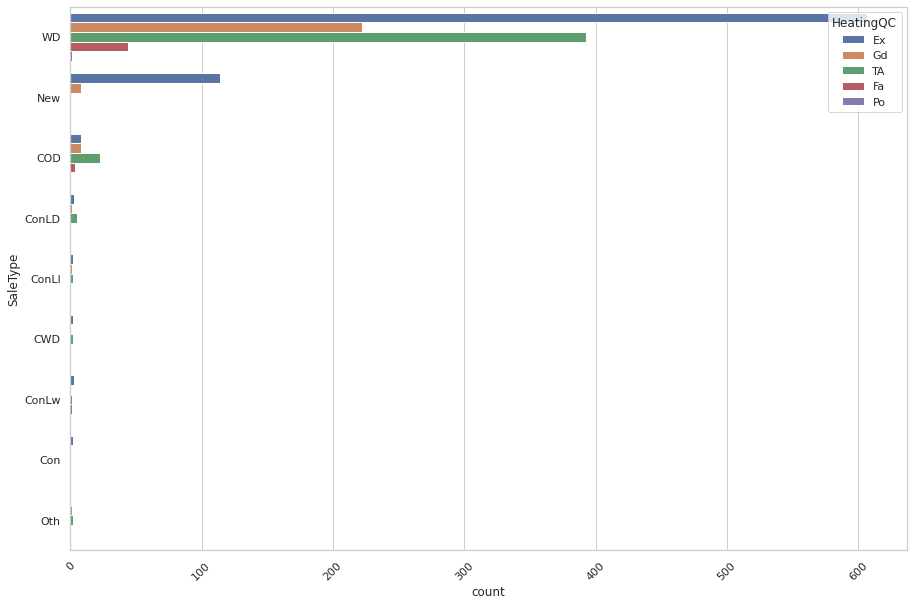

In [41]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,10))
plt.xticks(rotation=45)

sns.countplot(data=df3a_clean, y="SaleType", hue="HeatingQC")

<AxesSubplot:xlabel='count', ylabel='GarageQual'>

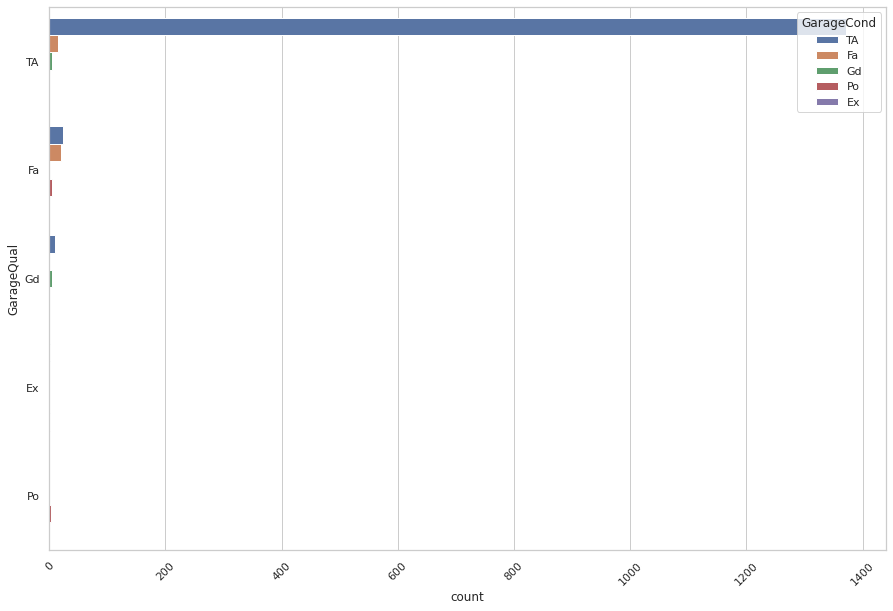

In [42]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,10))
plt.xticks(rotation=45)

sns.countplot(data=df3a_clean, y="GarageQual", hue="GarageCond")

<AxesSubplot:xlabel='count', ylabel='Electrical'>

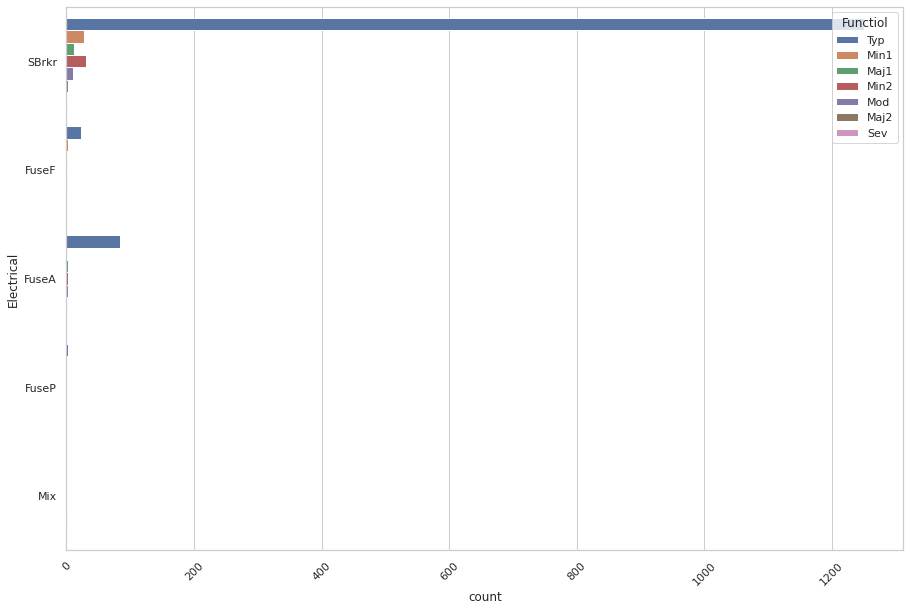

In [43]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,10))
plt.xticks(rotation=45)

sns.countplot(data=df3a_clean, y="Electrical", hue="Functiol")

In [44]:
#Electrical    
 # KitchenQual    
 # Functiol

<AxesSubplot:xlabel='count', ylabel='Electrical'>

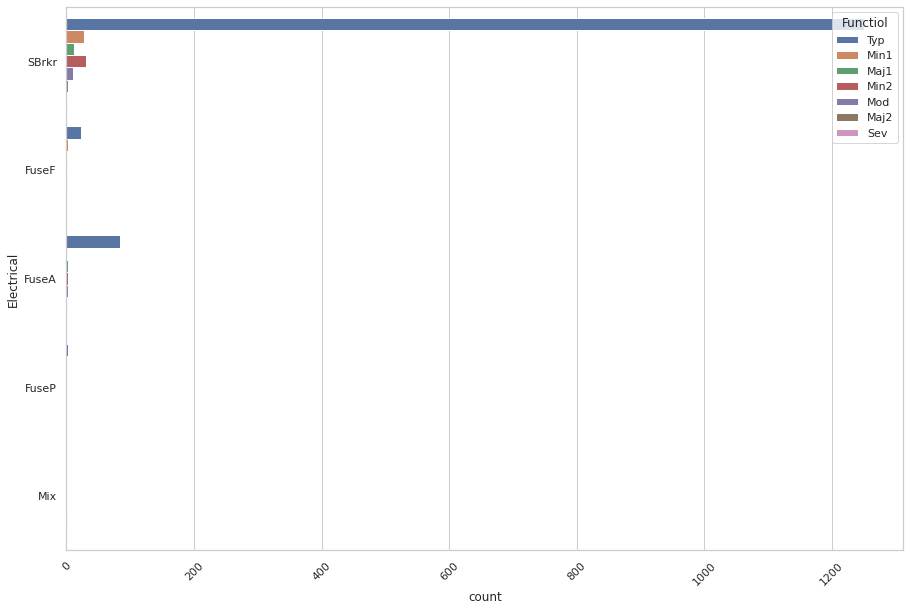

In [45]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,10))
plt.xticks(rotation=45)

sns.countplot(data=df3a_clean, y="Electrical", hue="Functiol")

<AxesSubplot:xlabel='count', ylabel='KitchenQual'>

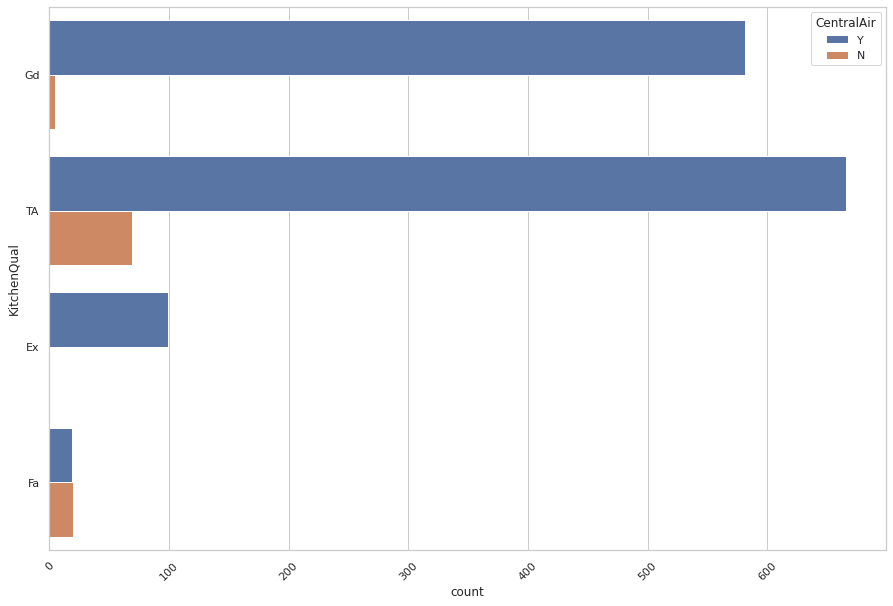

In [46]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,10))
plt.xticks(rotation=45)

sns.countplot(data=df3a_clean, y="KitchenQual", hue="CentralAir")

<AxesSubplot:xlabel='count', ylabel='Electrical'>

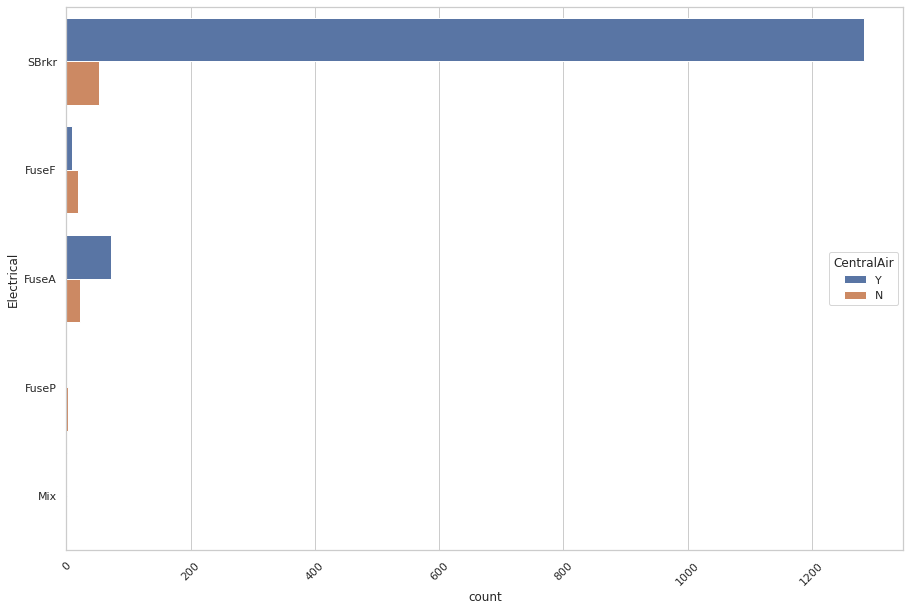

In [47]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,10))
plt.xticks(rotation=45)

sns.countplot(data=df3a_clean, y="Electrical", hue="CentralAir")

<AxesSubplot:xlabel='count', ylabel='Heating'>

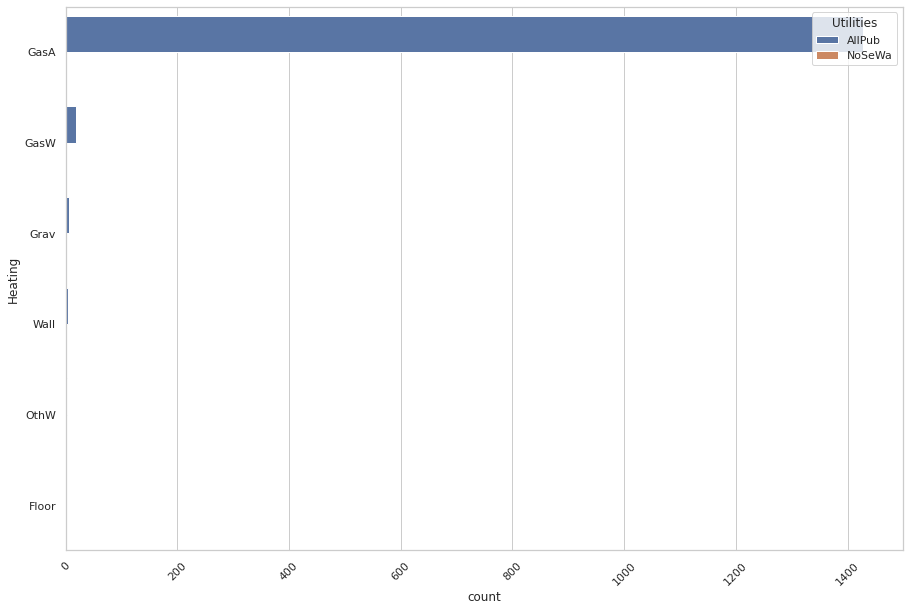

In [48]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,10))
plt.xticks(rotation=45)

sns.countplot(data=df3a_clean, y="Heating", hue="Utilities")

<AxesSubplot:xlabel='count', ylabel='ExterQual'>

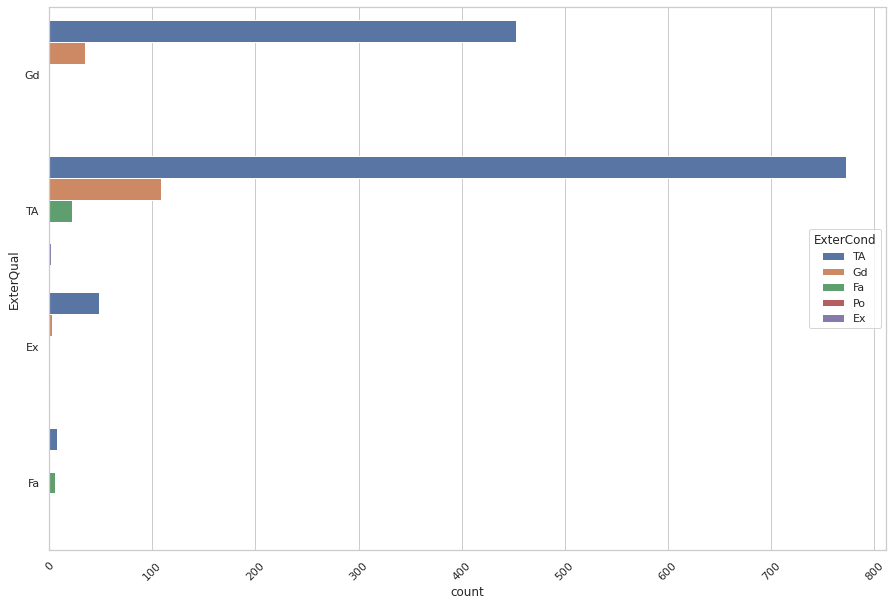

In [49]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,10))
plt.xticks(rotation=45)

sns.countplot(data=df3a_clean, y="ExterQual", hue="ExterCond")

<AxesSubplot:xlabel='count', ylabel='ExterQual'>

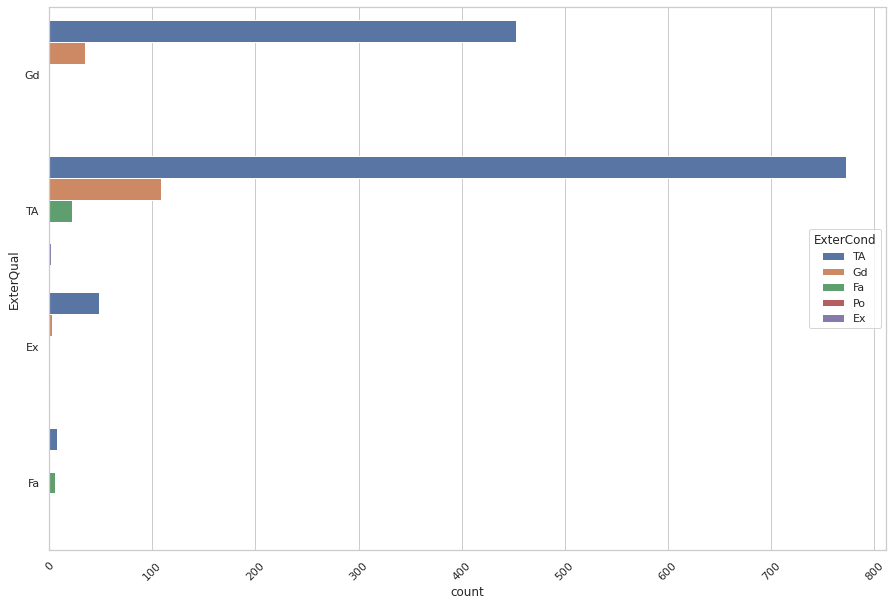

In [50]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,10))
plt.xticks(rotation=45)

sns.countplot(data=df3a_clean, y="ExterQual", hue="ExterCond")

<AxesSubplot:xlabel='count', ylabel='MSZoning'>

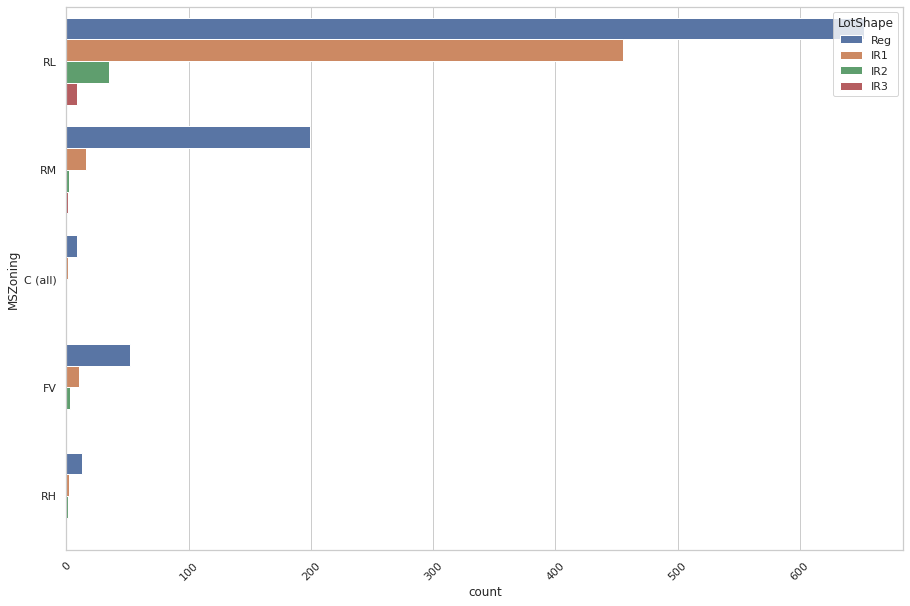

In [51]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,10))
plt.xticks(rotation=45)

sns.countplot(data=df3a_clean, y="MSZoning", hue="LotShape")

<AxesSubplot:xlabel='count', ylabel='BldgType'>

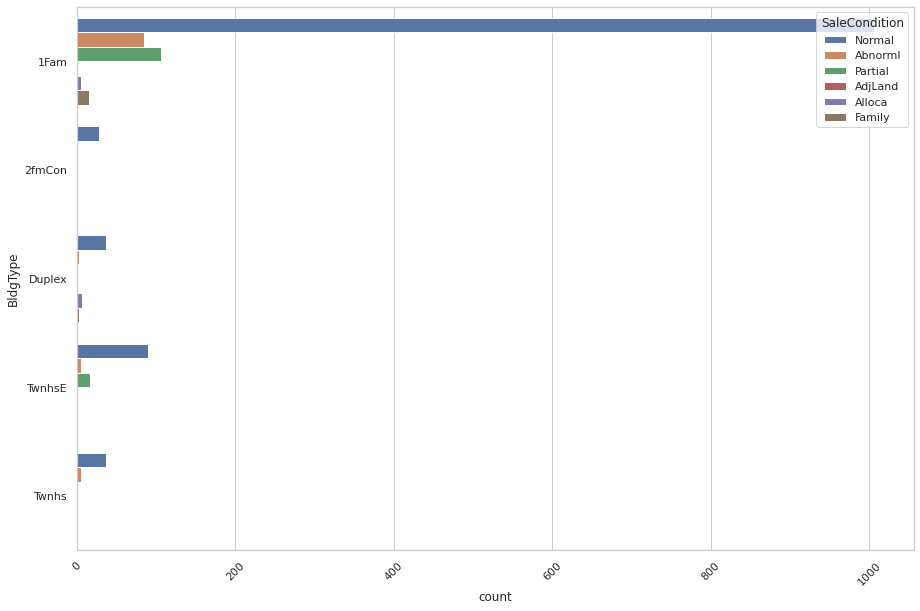

In [52]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,10))
plt.xticks(rotation=45)

sns.countplot(data=df3a_clean, y="BldgType", hue="SaleCondition")

<AxesSubplot:xlabel='count', ylabel='Foundation'>

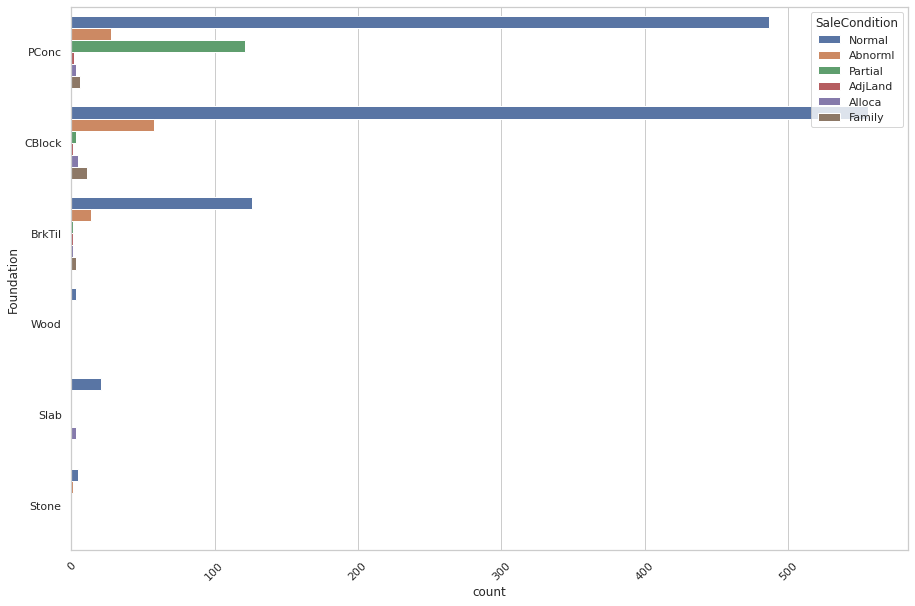

In [53]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,10))
plt.xticks(rotation=45)

sns.countplot(data=df3a_clean, y="Foundation", hue="SaleCondition")

<AxesSubplot:xlabel='count', ylabel='Condition1'>

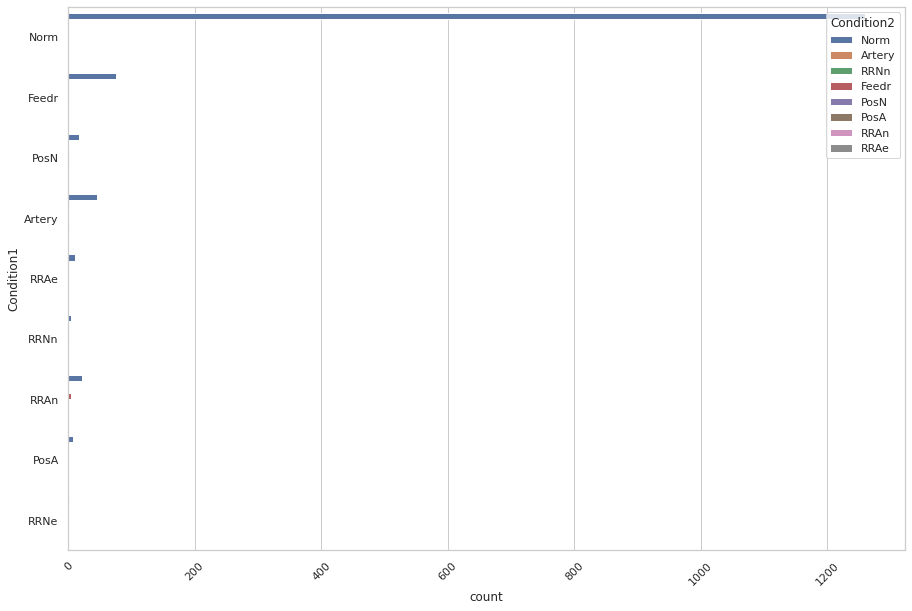

In [54]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,10))
plt.xticks(rotation=45)

sns.countplot(data=df3a_clean, y="Condition1", hue="Condition2")

<AxesSubplot:xlabel='count', ylabel='HouseStyle'>

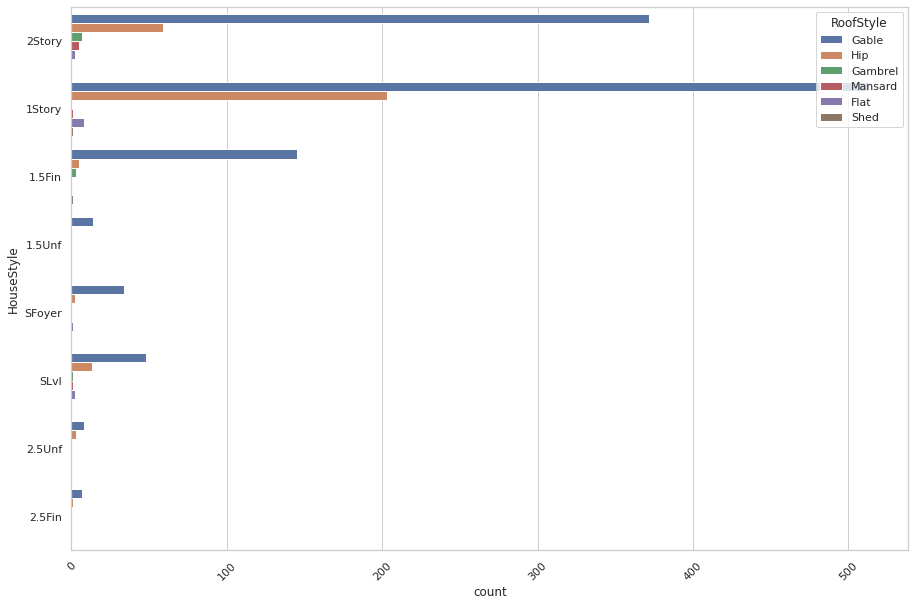

In [55]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,10))
plt.xticks(rotation=45)

sns.countplot(data=df3a_clean, y="HouseStyle", hue="RoofStyle")

<AxesSubplot:xlabel='count', ylabel='Exterior1st'>

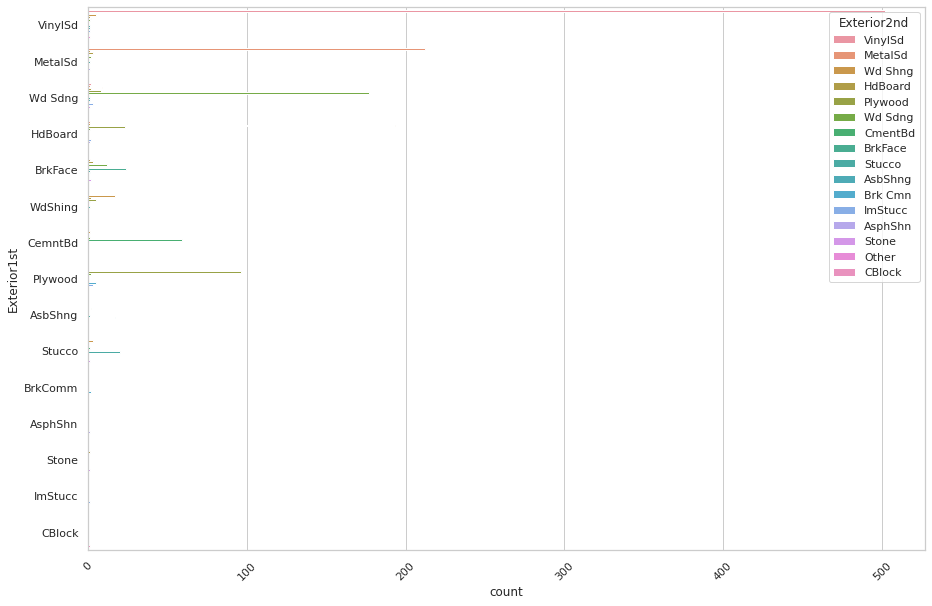

In [56]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,10))
plt.xticks(rotation=45)

sns.countplot(data=df3a_clean, y="Exterior1st", hue="Exterior2nd")

<AxesSubplot:xlabel='BsmtFinType1', ylabel='count'>

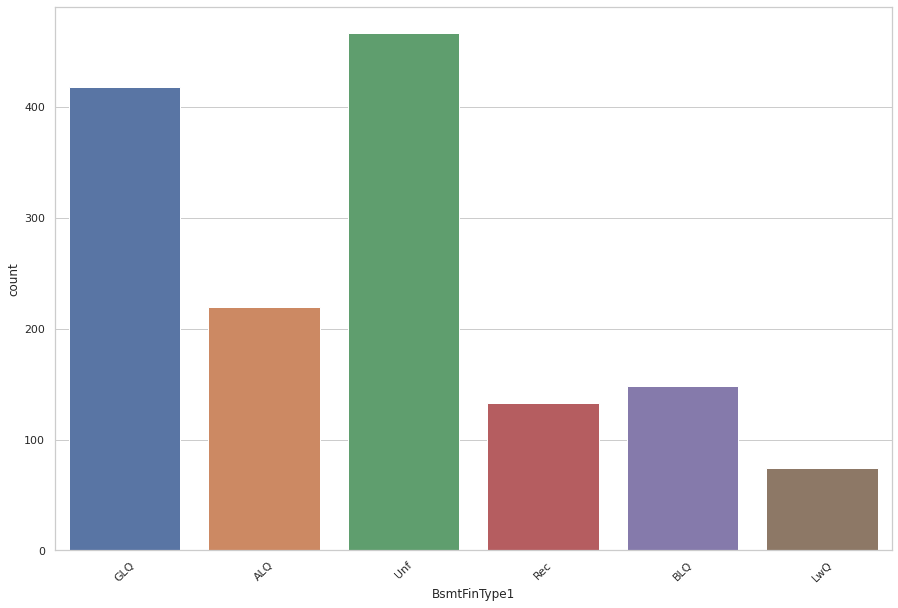

In [57]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,10))
plt.xticks(rotation=45)
sns.countplot(x=df3a_clean["BsmtFinType1"])

In [58]:

#in order to draw boxplots we need to transform the categorical variables into numbers 
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label_encoded_df = df3a_clean.copy()
for col in label_encoded_df.select_dtypes(include='O').columns:
    label_encoded_df[col]=le.fit_transform(label_encoded_df[col])



In [59]:
df4=label_encoded_df
df4
##The label encoding has meaning had the problem of magnitude introduction in our database
#i tried to chenge the encoding but I couldn't Anyway.

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functiol,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,3,1,3,3,0,4,0,5,2,2,...,4,2,6,1,1,4,4,2,8,4
2,3,1,3,3,0,2,0,23,1,2,...,4,3,6,1,1,4,4,2,8,4
3,3,1,0,3,0,4,0,5,2,2,...,4,2,6,1,1,4,4,2,8,4
4,3,1,0,3,0,0,0,6,2,2,...,4,2,6,5,2,4,4,2,8,0
5,3,1,0,3,0,2,0,14,2,2,...,4,2,6,1,1,4,4,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,3,1,3,3,0,4,0,8,2,2,...,4,3,6,1,1,4,4,2,8,4
1457,3,1,3,3,0,4,0,13,2,2,...,4,3,2,1,2,4,4,2,8,4
1458,3,1,3,3,0,4,0,6,2,2,...,4,2,6,1,1,4,4,2,8,4


In [60]:
correlation1=df4.corr()
correlation1

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functiol,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
MSZoning,1.000000,0.087654,0.061887,-0.017854,-0.001192,-0.009895,-0.022055,-0.216562,-0.027874,0.044606,...,-0.070818,0.128976,-0.095722,0.116007,0.167501,-0.150802,-0.083272,-0.100366,0.097437,0.009494
Street,0.087654,1.000000,-0.010224,0.115995,0.001682,0.013960,-0.179360,0.006028,-0.071657,0.002039,...,0.021324,-0.025307,-0.016444,0.001517,-0.008277,-0.013853,-0.011950,0.024521,0.014339,0.006064
LotShape,0.061887,-0.010224,1.000000,0.085434,-0.036101,0.221102,-0.099951,-0.000536,-0.115003,-0.043768,...,-0.097017,0.122182,-0.029321,0.168451,0.231392,-0.093127,-0.067882,-0.113698,-0.000911,-0.038118
LandContour,-0.017854,0.115995,0.085434,1.000000,0.008238,-0.025527,-0.374267,0.072068,0.024801,-0.016185,...,0.082650,0.030813,0.036113,-0.076679,-0.084288,0.008759,0.004346,0.140921,-0.025754,0.033809
Utilities,-0.001192,0.001682,-0.036101,0.008238,1.000000,-0.032589,-0.005909,0.030618,-0.000950,-0.000831,...,-0.091728,-0.010717,0.006702,-0.003099,-0.007380,0.005646,0.004870,0.007586,-0.126770,-0.089701
LotConfig,-0.009895,0.013960,0.221102,-0.025527,-0.032589,1.000000,-0.007256,-0.043016,0.021457,0.033868,...,-0.025353,-0.010437,-0.021119,0.011562,0.024764,0.023167,0.031285,-0.045058,0.014325,0.051579
LandSlope,-0.022055,-0.179360,-0.099951,-0.374267,-0.005909,-0.007256,1.000000,-0.086988,-0.016762,-0.026322,...,-0.014349,-0.002735,-0.106851,-0.001337,0.025008,0.015266,-0.016590,-0.024538,0.054858,-0.043095
Neighborhood,-0.216562,0.006028,-0.000536,0.072068,0.030618,-0.043016,-0.086988,1.000000,-0.071289,0.008160,...,0.010720,0.030636,0.003404,-0.049526,0.019752,0.025416,0.025214,0.106985,-0.043792,-0.031195
Condition1,-0.027874,-0.071657,-0.115003,0.024801,-0.000950,0.021457,-0.016762,-0.071289,1.000000,-0.074268,...,0.080034,-0.050028,-0.014877,-0.043308,-0.137571,0.071580,0.022276,0.105864,-0.002338,0.057747
Condition2,0.044606,0.002039,-0.043768,-0.016185,-0.000831,0.033868,-0.026322,0.008160,-0.074268,1.000000,...,0.019666,-0.038491,0.008125,0.050369,-0.008947,-0.024328,0.052754,-0.006788,0.004848,0.045074


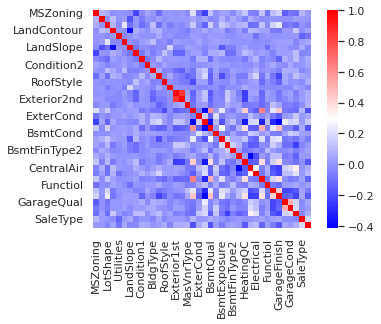

<Figure size 2664x2664 with 0 Axes>

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(data=correlation1, square=True, cmap ="bwr")

plt.yticks(rotation = 0)
plt.xticks(rotation =90)
plt.figure(figsize=(37,37))
plt.show()

<AxesSubplot:>

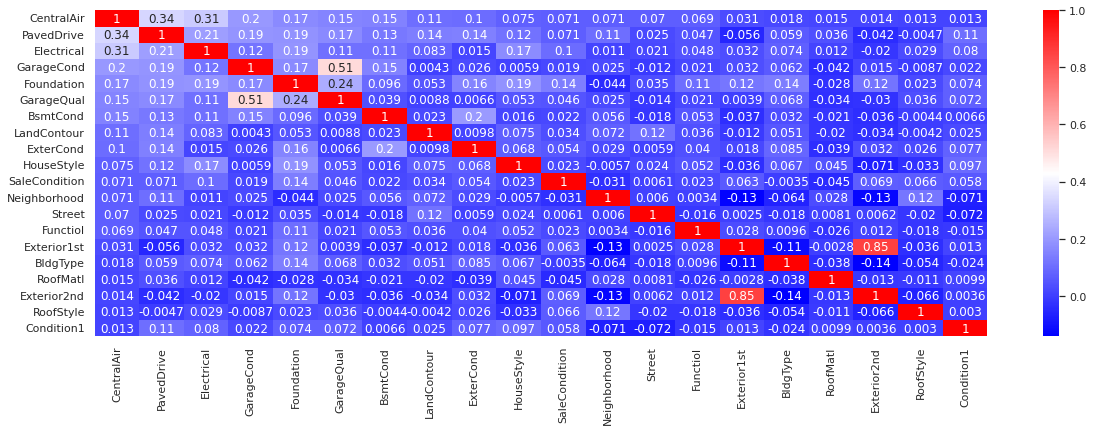

In [62]:
d=20 #number of variables
variab=df4.corr().nlargest(d,'CentralAir')['CentralAir'].index
cm=df4[variab].corr()
plt.figure(figsize=(20,6))
sns.heatmap(cm, annot=True, cmap='bwr')

#This code was written by using the course material 'Lesson 6 EDA' from Simplieleran website

In [63]:
significantCat=['CentralAir', 'PavedDrive', ',GarageQual', 'GarageCond', 'Foundation', 'Exterior1st', 'Exterior2nd', 'Electrical' ]
significantvar = ['SalePrice','OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF']

In [64]:
#Q5 5.	Combine all the significant categorical and numerical variables

In [65]:
newdf4 = df4[['CentralAir', 'PavedDrive', 'GarageQual', 'GarageCond', 'Foundation', 'Exterior1st', 'Exterior2nd', 'Electrical' ]].copy()
newdf4

,CentralAir,PavedDrive,GarageQual,GarageCond,Foundation,Exterior1st,Exterior2nd,Electrical
Id,,,,,,,,
1,1,2,4,4,2,12,13,4
2,1,2,4,4,1,8,8,4
3,1,2,4,4,2,12,13,4
4,1,2,4,4,0,13,15,4
5,1,2,4,4,2,12,13,4
...,...,...,...,...,...,...,...,...
1456,1,2,4,4,2,12,13,4
1457,1,2,4,4,1,9,10,4
1458,1,2,4,4,4,5,5,4


In [66]:
newdf2 =df2[['SalePrice','OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF']].copy()
newdf2

,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,1stFlrSF
Id,,,,,,
1,208500,7,1710,2,856,856
2,181500,6,1262,2,1262,1262
3,223500,7,1786,2,920,920
4,140000,7,1717,3,756,961
5,250000,8,2198,3,1145,1145
...,...,...,...,...,...,...
1456,175000,6,1647,2,953,953
1457,210000,6,2073,2,1542,2073
1458,266500,7,2340,1,1152,1188


In [67]:
new_merged_data = pd.concat([newdf2, newdf4], axis=1)
new_merged_data

,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,1stFlrSF,CentralAir,PavedDrive,GarageQual,GarageCond,Foundation,Exterior1st,Exterior2nd,Electrical
Id,,,,,,,,,,,,,,
1,208500,7,1710,2,856,856,1,2,4,4,2,12,13,4
2,181500,6,1262,2,1262,1262,1,2,4,4,1,8,8,4
3,223500,7,1786,2,920,920,1,2,4,4,2,12,13,4
4,140000,7,1717,3,756,961,1,2,4,4,0,13,15,4
5,250000,8,2198,3,1145,1145,1,2,4,4,2,12,13,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,175000,6,1647,2,953,953,1,2,4,4,2,12,13,4
1457,210000,6,2073,2,1542,2073,1,2,4,4,1,9,10,4
1458,266500,7,2340,1,1152,1188,1,2,4,4,4,5,5,4


In [68]:
#q6.	Plot box plot for the new dataset to find the variables with outliers

<AxesSubplot:title={'center':'SalePrice'}, xlabel='OverallQual'>

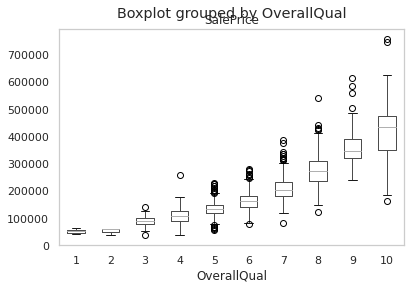

In [69]:
new_merged_data.boxplot(by ='OverallQual', column =['SalePrice'], grid = False)

<AxesSubplot:title={'center':'SalePrice'}, xlabel='GarageCars'>

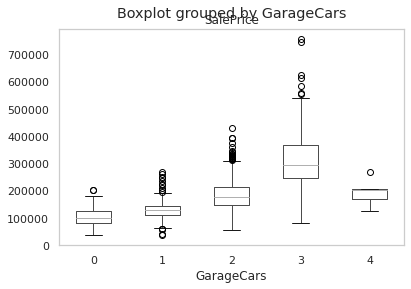

In [70]:
new_merged_data.boxplot(by ='GarageCars', column =['SalePrice'], grid = False)

<AxesSubplot:title={'center':'SalePrice'}, xlabel='CentralAir'>

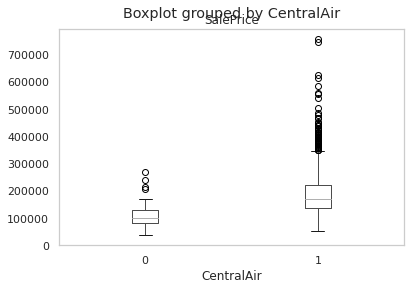

In [71]:
new_merged_data.boxplot(by ='CentralAir', column =['SalePrice'], grid = False)

<AxesSubplot:title={'center':'SalePrice'}, xlabel='CentralAir'>

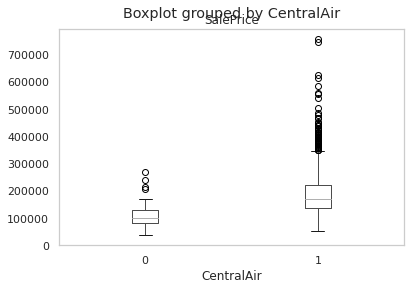

In [72]:
new_merged_data.boxplot(by ='CentralAir', column =['SalePrice'], grid = False)


In [1]:
new_merged_data.boxplot(by ='SalePrice', column =['Electrical'], grid = False)

NameError: name 'new_merged_data' is not defined

In [2]:
new_merged_data.boxplot(by ='Foundation', column =['SalePrice'], grid = False)

NameError: name 'new_merged_data' is not defined

In [3]:
# I am not sure anymore, it seems most of the variables grouped by SalePrice, the parameter we need to examine have outliers